In [ ]:
#import pandas as pd
#!pip install lux-api

     |████████████████████████████████| 102kB 3.9MB/s 
     |████████████████████████████████| 2.2MB 6.9MB/s 
  Created wheel for lux-api: filename=lux_api-0.2.3-cp37-none-any.whl size=146692 sha256=7f72af4c83b2d80d333dc08934992aaabde7dcb9efaa409fdd15020ba8dafad0
  Stored in directory: /root/.cache/pip/wheels/2a/b2/48/6e2783a1c271118960c6535e5b67a4e27ed95a1f9cc951d63e
  Created wheel for lux-widget: filename=lux_widget-0.1.4-cp37-none-any.whl size=4294796 sha256=b70305a8446f480773e806299042489d071c4a946bacc04a88a2dbc88a775837
  Stored in directory: /root/.cache/pip/wheels/b3/3b/52/3525b6e5ceefa1058911acccc3b3bbc2090f7bb215018521c3
Successfully built lux-api lux-widget


In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import lux
import pandas as pd
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from IPython.display import Image 
import io
#import pydotplus
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

In [ ]:
url = '/content/drive/My Drive/Colab Notebooks/Poverty Prediction/Data/file2.csv'
df = pd.read_csv(url, encoding='utf-8')
df1 = pd.read_csv(url, encoding='utf-8')
df_extra = pd.read_csv(url, encoding='utf-8')

In [ ]:
print("Number of rows in data =",df1.shape[0])
print("Number of columns in data =",df1.shape[1])
print("\n")
print("**Sample data:**")
df1.head(5)

Number of rows in data = 45812
Number of columns in data = 85


**Sample data:**


/usr/local/lib/python3.7/dist-packages/IPython/core/formatters.py:338: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


,hhid,popwgt,roster_a_5,roster_a_6b,roster_a_7,roster_a_13,educ_a_2,educ_a_3,educ_a_4,educ_a_5,years_educ,health_a1_1,member,nemployed,nmobile,nmobile_per,nemployed_per,tot_difficulties,nread,nread_per,nwrite,nwrite_per,max_edu,tot_edu_yr,avg_edu_yr,spend_on_edu,tot_sci,spend_on_health,hhwgt,housing_a_2,housing_a_3,housing_a_4a,housing_a_4c,housing_a_5b,housing_a_6b,housing_a_7,housing_a_8a,housing_a_8b,housing_a_9,housing_a_10,...,housing_a_17,housing_a_18,housing_a_19,housing_a_21b,housing_a_22,housing_a_25,oincome_a_1b,oincome_a_2,oincome_a_4,oincome_a_6,oincome_a_8,oincome_d_1,agri_a_6,tot_income,tot_agri_val,urbrural_a,zf_a,realpcexp_a,realpce_b,quarter,ruc,division_code,zu16quarters,zl16quarters,zu16,zl16,fexp,hsvalhh,nfexp2,consexp2,hhincome,pcexp,pcincome,pline_nat,rpcexp,rpcincome,lowerpoorquarters,upperpoorquarters,lowerpoor,upperpoor
0,1001,536.84314,1,26.0,1.0,1.0,1.0,1.0,1.0,6.0,6.0,1.0,4,1,2,0.500000,0.250000,24,4,1.00,4,1.00,11.0,23,5.75,19400,2,0,134.21078,4.0,2.0,1.0,3.0,3.0,2.0,640.0,1.0,2.0,2.0,2.0,...,2.0,2.0,2.0,1.0,700000.0,2.0,NaN,NaN,NaN,NaN,40000.0,2.0,0.06,2000,0,2,1544.4044,3597.4141,3606.0095,4,2,10,2792.6943,2019.6479,2756.45,1993.4365,10236.5120,2500.0,7248.833,17485.3440,13500.000,4371.3359,3375.0000,2268.1511,3596.9639,2777.1265,0,0,0,0
1,1003,536.84314,1,23.0,1.0,1.0,1.0,1.0,1.0,10.0,10.0,1.0,4,1,2,0.500000,0.250000,24,4,1.00,4,1.00,10.0,25,6.25,8400,2,0,134.21078,4.0,2.0,1.0,3.0,3.0,2.0,520.0,1.0,2.0,2.0,2.0,...,2.0,2.0,2.0,1.0,1000000.0,2.0,NaN,NaN,NaN,NaN,12000.0,2.0,0.10,1000,0,2,1544.4044,3297.9414,3305.8213,4,2,10,2792.6943,2019.6479,2756.45,1993.4365,10218.9140,2000.0,5810.833,16029.7470,10666.667,4007.4368,2666.6667,2268.1511,3297.5286,2194.2729,0,0,0,0
2,1004,536.84314,1,23.0,1.0,1.0,2.0,2.0,2.0,0.0,0.0,1.0,4,1,3,0.750000,0.250000,24,3,0.75,3,0.75,10.0,7,1.75,16500,2,0,134.21078,2.0,2.0,1.0,3.0,3.0,2.0,200.0,1.0,2.0,2.0,2.0,...,2.0,2.0,2.0,1.0,200000.0,2.0,NaN,NaN,NaN,NaN,15000.0,2.0,0.02,0,1,2,1544.4044,2988.6277,2995.7686,4,2,10,2792.6943,2019.6479,2756.45,1993.4365,7641.3184,2500.0,6885.000,14526.3180,15287.583,3631.5796,3821.8958,2268.1511,2988.2537,3144.8557,0,0,0,0
3,1011,805.26471,1,23.0,2.0,1.0,1.0,1.0,1.0,10.0,10.0,1.0,6,2,4,0.666667,0.333333,36,6,1.00,6,1.00,13.0,60,10.00,13600,3,0,134.21078,5.0,2.0,1.0,3.0,5.0,4.0,640.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,1.0,1200000.0,2.0,1.0,440000.0,NaN,NaN,50000.0,2.0,0.05,1500,1,2,1544.4044,3440.7961,3449.0173,4,2,10,2792.6943,2019.6479,2756.45,1993.4365,13491.3130,3000.0,11594.834,25086.1460,51958.332,4181.0244,8659.7217,2268.1511,3440.3655,7125.6719,0,0,0,0
4,1016,134.21078,1,26.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,1.0,1,1,1,1.000000,1.000000,6,1,1.00,1,1.00,3.0,3,3.00,0,1,0,134.21078,2.0,2.0,1.0,3.0,3.0,2.0,280.0,3.0,2.0,2.0,2.0,...,2.0,2.0,2.0,1.0,500000.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,0.04,0,0,2,1544.4044,5976.2046,5990.4834,4,2,10,2792.6943,2019.6479,2756.45,1993.4365,4504.3823,1500.0,2757.500,7261.8823,8533.333,7261.8823,8533.3330,2268.1511,5975.4565,7021.6729,0,0,0,0


In [ ]:
df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [ ]:
pip install chart_studio

In [ ]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly import tools
from datetime import date
import plotly.figure_factory as ff

from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb

import matplotlib.pyplot as plt
import seaborn as sns
import random 
import warnings
import operator

# Missing Values
One of the most important steps of exploratory data analysis is finding missing values in the data and determining how to handle them. Missing values have to be filled in before we use a machine learning model and we need to think of the best strategy for filling them in based on the feature: this is where we'll have to start digging into the data definitions.

First we can look at the percentage of missing values in each column.


In [ ]:
df1 = df1.drop(columns=['hhid', 'popwgt', 'nemployed', 'nmobile', 'nread', 'nwrite', 'tot_edu_yr',
                 'hhwgt', 'housing_a_11', 'housing_a_12', 'housing_a_25', 'quarter',
                  'zf_a', 'realpcexp_a', 'realpce_b','pline_nat' ,'zu16quarters','zl16quarters','zu16', 
                 'zl16','fexp','nfexp2','consexp2','pcexp','rpcexp',
                 'lowerpoorquarters', 'upperpoorquarters'])


In [ ]:
#shows which column contain missing values
df1.columns[df1.isnull().any()]


Index(['roster_a_6b', 'roster_a_7', 'roster_a_13', 'educ_a_2', 'educ_a_3',
       'educ_a_4', 'educ_a_5', 'years_educ', 'health_a1_1', 'max_edu',
       'housing_a_2', 'housing_a_3', 'housing_a_4a', 'housing_a_4c',
       'housing_a_5b', 'housing_a_6b', 'housing_a_7', 'housing_a_8a',
       'housing_a_8b', 'housing_a_9', 'housing_a_10', 'housing_a_13',
       'housing_a_14', 'housing_a_15', 'housing_a_17', 'housing_a_18',
       'housing_a_19', 'housing_a_21b', 'housing_a_22', 'oincome_a_1b',
       'oincome_a_2', 'oincome_a_4', 'oincome_a_6', 'oincome_a_8',
       'oincome_d_1', 'agri_a_6', 'hhincome', 'pcincome', 'rpcincome'],
      dtype='object')

In [ ]:
# Number of missing in each column
missing = pd.DataFrame(df1.isnull().sum()).rename(columns = {0: 'total'})

# Create a percentage missing
missing['percent'] = missing['total'] / len(df1)

missing.sort_values('percent', ascending = False).head(10)


,total,percent
oincome_a_6,45716,0.997904
oincome_a_4,44868,0.979394
oincome_a_1b,44757,0.976971
oincome_a_2,44755,0.976927
oincome_a_8,23013,0.502336
housing_a_15,12496,0.272767
housing_a_10,5095,0.111215
roster_a_6b,992,0.021654
rpcincome,278,0.006068
pcincome,278,0.006068


In [ ]:
df1 = df1.drop(columns=['oincome_a_6', 'oincome_a_4', 'oincome_a_1b', 'oincome_a_2' ])

In [ ]:
#set all missing values as zero (0)
df1 = df1.replace(np.nan, 0)


In [ ]:
print("Number of rows in data =",df1.shape[0])
print("Number of columns in data =",df1.shape[1])
print("\n")
print("**Sample data:**")
df1.head(5)

Number of rows in data = 45812
Number of columns in data = 54


**Sample data:**


,roster_a_5,roster_a_6b,roster_a_7,roster_a_13,educ_a_2,educ_a_3,educ_a_4,educ_a_5,years_educ,health_a1_1,member,nmobile_per,nemployed_per,tot_difficulties,nread_per,nwrite_per,max_edu,avg_edu_yr,spend_on_edu,tot_sci,spend_on_health,housing_a_2,housing_a_3,housing_a_4a,housing_a_4c,housing_a_5b,housing_a_6b,housing_a_7,housing_a_8a,housing_a_8b,housing_a_9,housing_a_10,housing_a_13,housing_a_14,housing_a_15,housing_a_17,housing_a_18,housing_a_19,housing_a_21b,housing_a_22,oincome_a_8,oincome_d_1,agri_a_6,tot_income,tot_agri_val,urbrural_a,ruc,division_code,hsvalhh,hhincome,pcincome,rpcincome,lowerpoor,upperpoor
0,1,26.0,1.0,1.0,1.0,1.0,1.0,6.0,6.0,1.0,4,0.500000,0.250000,24,1.00,1.00,11.0,5.75,19400,2,0,4.0,2.0,1.0,3.0,3.0,2.0,640.0,1.0,2.0,2.0,2.0,3.0,1.0,22.0,2.0,2.0,2.0,1.0,700000.0,40000.0,2.0,0.06,2000,0,2,2,10,2500.0,13500.000,3375.0000,2777.1265,0,0
1,1,23.0,1.0,1.0,1.0,1.0,1.0,10.0,10.0,1.0,4,0.500000,0.250000,24,1.00,1.00,10.0,6.25,8400,2,0,4.0,2.0,1.0,3.0,3.0,2.0,520.0,1.0,2.0,2.0,2.0,3.0,1.0,21.0,2.0,2.0,2.0,1.0,1000000.0,12000.0,2.0,0.10,1000,0,2,2,10,2000.0,10666.667,2666.6667,2194.2729,0,0
2,1,23.0,1.0,1.0,2.0,2.0,2.0,0.0,0.0,1.0,4,0.750000,0.250000,24,0.75,0.75,10.0,1.75,16500,2,0,2.0,2.0,1.0,3.0,3.0,2.0,200.0,1.0,2.0,2.0,2.0,3.0,1.0,20.0,2.0,2.0,2.0,1.0,200000.0,15000.0,2.0,0.02,0,1,2,2,10,2500.0,15287.583,3821.8958,3144.8557,0,0
3,1,23.0,2.0,1.0,1.0,1.0,1.0,10.0,10.0,1.0,6,0.666667,0.333333,36,1.00,1.00,13.0,10.00,13600,3,0,5.0,2.0,1.0,3.0,5.0,4.0,640.0,2.0,2.0,2.0,2.0,3.0,1.0,21.0,2.0,2.0,2.0,1.0,1200000.0,50000.0,2.0,0.05,1500,1,2,2,10,3000.0,51958.332,8659.7217,7125.6719,0,0
4,1,26.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,1.0,1,1.000000,1.000000,6,1.00,1.00,3.0,3.00,0,1,0,2.0,2.0,1.0,3.0,3.0,2.0,280.0,3.0,2.0,2.0,2.0,3.0,1.0,20.0,2.0,2.0,2.0,1.0,500000.0,0.0,2.0,0.04,0,0,2,2,10,1500.0,8533.333,8533.3330,7021.6729,0,0


# Removing Constant and Quasi-Constant features

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
feature = df1.iloc[:,0:54]
feature.columns

Index(['roster_a_5', 'roster_a_6b', 'roster_a_7', 'roster_a_13', 'educ_a_2',
       'educ_a_3', 'educ_a_4', 'educ_a_5', 'years_educ', 'health_a1_1',
       'member', 'nmobile_per', 'nemployed_per', 'tot_difficulties',
       'nread_per', 'nwrite_per', 'max_edu', 'avg_edu_yr', 'spend_on_edu',
       'tot_sci', 'spend_on_health', 'housing_a_2', 'housing_a_3',
       'housing_a_4a', 'housing_a_4c', 'housing_a_5b', 'housing_a_6b',
       'housing_a_7', 'housing_a_8a', 'housing_a_8b', 'housing_a_9',
       'housing_a_10', 'housing_a_13', 'housing_a_14', 'housing_a_15',
       'housing_a_17', 'housing_a_18', 'housing_a_19', 'housing_a_21b',
       'housing_a_22', 'oincome_a_8', 'oincome_d_1', 'agri_a_6', 'tot_income',
       'tot_agri_val', 'urbrural_a', 'ruc', 'division_code', 'hsvalhh',
       'hhincome', 'pcincome', 'rpcincome', 'lowerpoor', 'upperpoor'],
      dtype='object')

In [ ]:
#removing constant features 
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(feature)

len(feature.columns[constant_filter.get_support()])

constant_columns = [column for column in feature.columns
                    if column not in feature.columns[constant_filter.get_support()]]
print("Constant Column: ", constant_columns)

feature.drop(labels=constant_columns, axis=1, inplace=True)

Constant Column:  []


In [ ]:
#removing quasi-constant features

In [ ]:
qconstant_filter = VarianceThreshold(threshold=0.03) #97% constant value

In [ ]:
qconstant_filter.fit(feature)

VarianceThreshold(threshold=0.03)

In [ ]:
qconstant_columns = [column for column in feature.columns
                    if column not in feature.columns[qconstant_filter.get_support()]]

print(len(qconstant_columns))

2


In [ ]:
for column in qconstant_columns:
    print(column)

housing_a_17
housing_a_18


In [ ]:
feature.drop(labels=qconstant_columns, axis=1, inplace=True)

In [ ]:
feature.columns

Index(['roster_a_5', 'roster_a_6b', 'roster_a_7', 'roster_a_13', 'educ_a_2',
       'educ_a_3', 'educ_a_4', 'educ_a_5', 'years_educ', 'health_a1_1',
       'member', 'nmobile_per', 'nemployed_per', 'tot_difficulties',
       'nread_per', 'nwrite_per', 'max_edu', 'avg_edu_yr', 'spend_on_edu',
       'tot_sci', 'spend_on_health', 'housing_a_2', 'housing_a_3',
       'housing_a_4a', 'housing_a_4c', 'housing_a_5b', 'housing_a_6b',
       'housing_a_7', 'housing_a_8a', 'housing_a_8b', 'housing_a_9',
       'housing_a_10', 'housing_a_13', 'housing_a_14', 'housing_a_15',
       'housing_a_19', 'housing_a_21b', 'housing_a_22', 'oincome_a_8',
       'oincome_d_1', 'agri_a_6', 'tot_income', 'tot_agri_val', 'urbrural_a',
       'ruc', 'division_code', 'hsvalhh', 'hhincome', 'pcincome', 'rpcincome',
       'lowerpoor', 'upperpoor'],
      dtype='object')

# Removing Duplicate Features

In [ ]:
#We will use this method to first take a transpose of our dataset 
feature_T = feature.T
feature_T.shape

(52, 45812)

In [ ]:
#Let's find the total number of duplicate features in our dataset using the sum() method, chained with the duplicated() method

print(feature_T.duplicated().sum())

0


In [ ]:
feature = feature_T.drop_duplicates(keep='first').T
feature.shape

(45812, 52)

# Removing Correlated Features
Correlation between the output observations and the input features is very important and such features should be retained. However, if two or more than two features are mutually correlated, they convey redundant information to the model and hence only one of the correlated features should be retained to reduce the number of features.

In [ ]:
correlated_features = set()
correlation_matrix = feature.corr()

In [ ]:
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [ ]:
print("length of correlated features: " , len(correlated_features))
print(correlated_features)

length of correlated features:  10
{'tot_difficulties', 'rpcincome', 'years_educ', 'educ_a_3', 'educ_a_5', 'ruc', 'housing_a_15', 'pcincome', 'educ_a_4', 'nwrite_per'}


In [ ]:
feature.columns

Index(['roster_a_5', 'roster_a_6b', 'roster_a_7', 'roster_a_13', 'educ_a_2',
       'educ_a_3', 'educ_a_4', 'educ_a_5', 'years_educ', 'health_a1_1',
       'member', 'nmobile_per', 'nemployed_per', 'tot_difficulties',
       'nread_per', 'nwrite_per', 'max_edu', 'avg_edu_yr', 'spend_on_edu',
       'tot_sci', 'spend_on_health', 'housing_a_2', 'housing_a_3',
       'housing_a_4a', 'housing_a_4c', 'housing_a_5b', 'housing_a_6b',
       'housing_a_7', 'housing_a_8a', 'housing_a_8b', 'housing_a_9',
       'housing_a_10', 'housing_a_13', 'housing_a_14', 'housing_a_15',
       'housing_a_19', 'housing_a_21b', 'housing_a_22', 'oincome_a_8',
       'oincome_d_1', 'agri_a_6', 'tot_income', 'tot_agri_val', 'urbrural_a',
       'ruc', 'division_code', 'hsvalhh', 'hhincome', 'pcincome', 'rpcincome',
       'lowerpoor', 'upperpoor'],
      dtype='object')

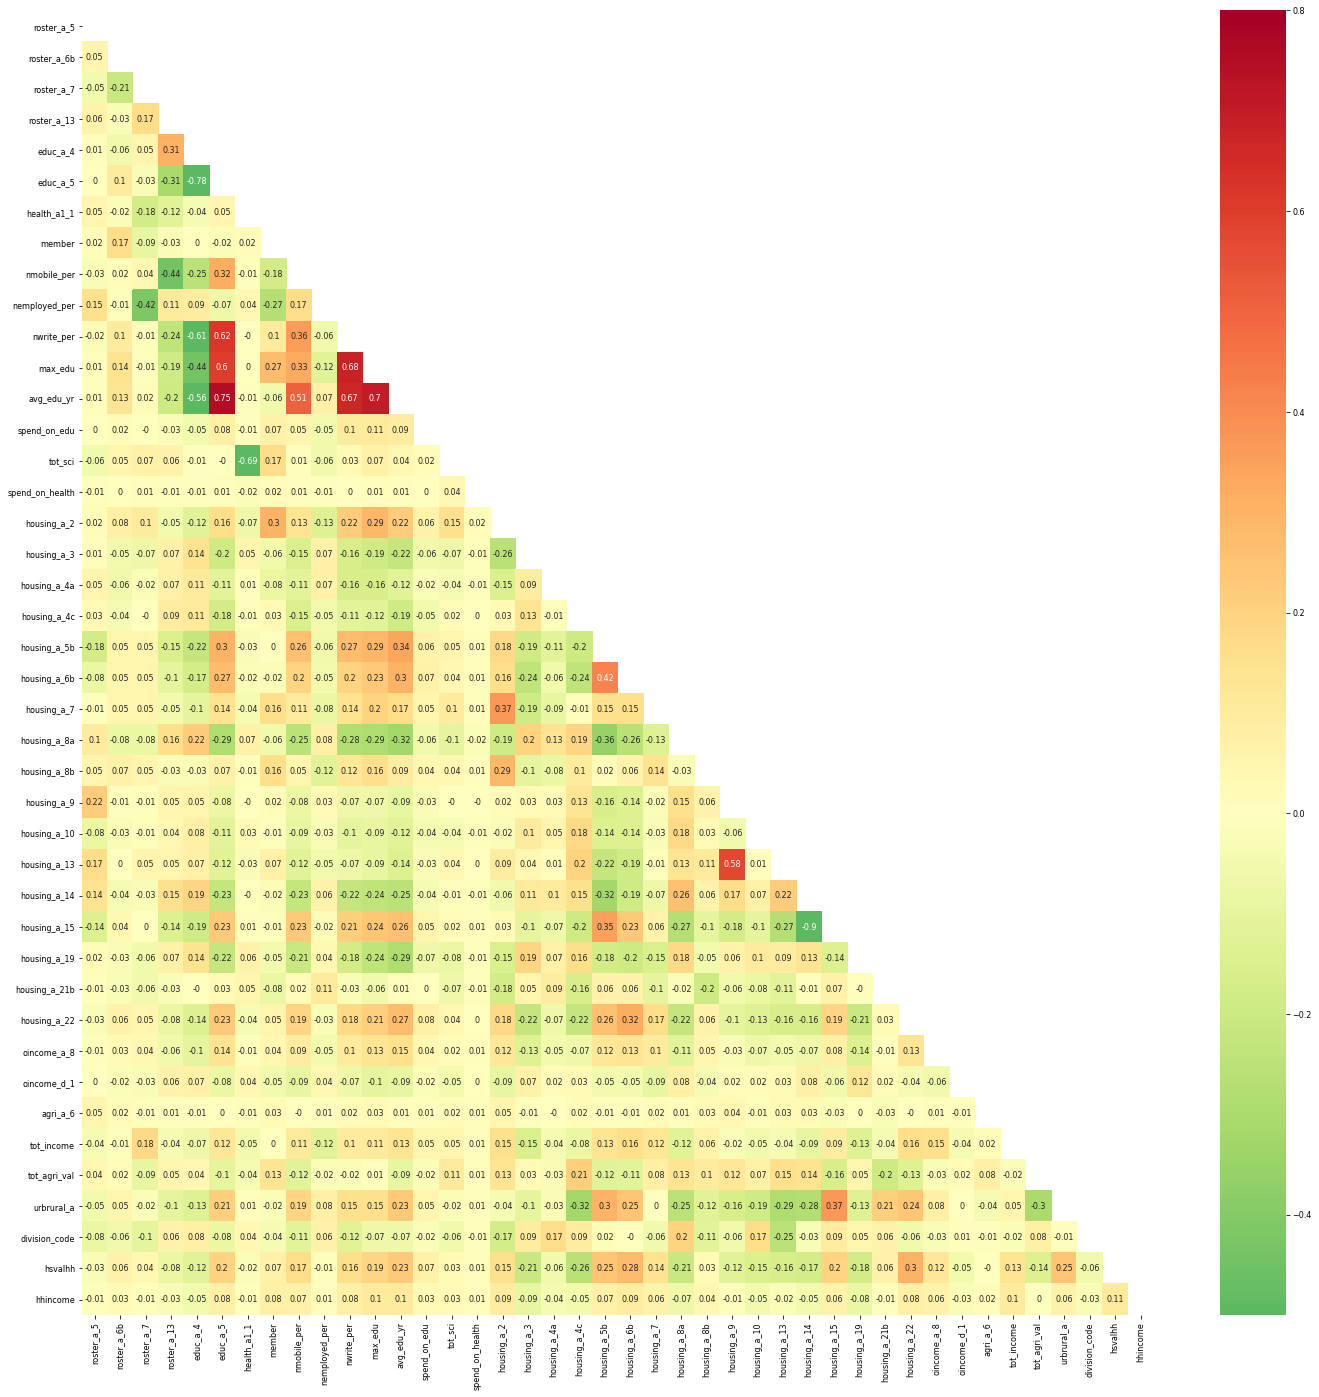

In [ ]:
'''variables = ['educ_a_3',
             'educ_a_4',
             'tot_difficulties',
             'educ_a_5',
             'ruc',
             'pcincome',
             'rpcincome',
             'years_educ',
             'nwrite_per',
             'housing_a_15']'''

variables = ['roster_a_5', 'roster_a_6b', 'roster_a_7', 'roster_a_13', 'educ_a_4',
       'educ_a_5', 'health_a1_1', 'member', 'nmobile_per', 'nemployed_per',
       'nwrite_per', 'max_edu', 'avg_edu_yr', 'spend_on_edu', 'tot_sci',
       'spend_on_health', 'housing_a_2', 'housing_a_3', 'housing_a_4a',
       'housing_a_4c', 'housing_a_5b', 'housing_a_6b', 'housing_a_7',
       'housing_a_8a', 'housing_a_8b', 'housing_a_9', 'housing_a_10',
       'housing_a_13', 'housing_a_14', 'housing_a_15', 'housing_a_19',
       'housing_a_21b', 'housing_a_22', 'oincome_a_8', 'oincome_d_1',
       'agri_a_6', 'tot_income', 'tot_agri_val', 'urbrural_a', 'division_code',
       'hsvalhh', 'hhincome']

# Calculate the correlations
corr_mat = df1[variables].corr().round(2)

# Draw a correlation heatmap
mask = np.triu(np.ones_like(corr_mat, dtype=bool))
plt.rcParams['font.size'] = 8
plt.figure(figsize = (24, 24))
sns.heatmap(corr_mat,mask = mask, vmin = -0.5, vmax = 0.8, center = 0, 
            cmap = plt.cm.RdYlGn_r, annot = True);

In [ ]:
print(correlation_matrix.loc[correlation_matrix['educ_a_3'].abs() > 0.9, correlation_matrix['educ_a_3'].abs() > 0.9])
print("\n",correlation_matrix.loc[correlation_matrix['years_educ'].abs() > 0.9, correlation_matrix['years_educ'].abs() > 0.9])
#print("\n",correlation_matrix.loc[correlation_matrix['realpce_b'].abs() > 0.9, correlation_matrix['realpce_b'].abs() > 0.9])
#print("\n",correlation_matrix.loc[correlation_matrix['pcexp'].abs() > 0.9, correlation_matrix['pcexp'].abs() > 0.9])
print("\n",correlation_matrix.loc[correlation_matrix['rpcincome'].abs() > 0.9, correlation_matrix['rpcincome'].abs() > 0.9])
print("\n",correlation_matrix.loc[correlation_matrix['nwrite_per'].abs() > 0.9, correlation_matrix['nwrite_per'].abs() > 0.9])
#print("\n",correlation_matrix.loc[correlation_matrix['rpcexp'].abs() > 0.9, correlation_matrix['rpcexp'].abs() > 0.9])
print("\n",correlation_matrix.loc[correlation_matrix['housing_a_15'].abs() > 0.9, correlation_matrix['housing_a_15'].abs() > 0.9])
#print("\n",correlation_matrix.loc[correlation_matrix['zu16quarters'].abs() > 0.9, correlation_matrix['zu16quarters'].abs() > 0.9])
print("\n",correlation_matrix.loc[correlation_matrix['ruc'].abs() > 0.9, correlation_matrix['ruc'].abs() > 0.9])
print("\n",correlation_matrix.loc[correlation_matrix['tot_difficulties'].abs() > 0.9, correlation_matrix['tot_difficulties'].abs() > 0.9])

In [ ]:
redundant_features = ['educ_a_2', 'educ_a_3', 'years_educ', 'pcincome', 'rpcincome', 'nread_per', 'ruc', 'tot_difficulties']


In [ ]:
feature.drop(labels=redundant_features, axis=1, inplace=True)

In [ ]:
feature.shape

(45812, 44)

In [ ]:
feature.head()

,roster_a_5,roster_a_6b,roster_a_7,roster_a_13,educ_a_4,educ_a_5,health_a1_1,member,nmobile_per,nemployed_per,nwrite_per,max_edu,avg_edu_yr,spend_on_edu,tot_sci,spend_on_health,housing_a_2,housing_a_3,housing_a_4a,housing_a_4c,housing_a_5b,housing_a_6b,housing_a_7,housing_a_8a,housing_a_8b,housing_a_9,housing_a_10,housing_a_13,housing_a_14,housing_a_15,housing_a_19,housing_a_21b,housing_a_22,oincome_a_8,oincome_d_1,agri_a_6,tot_income,tot_agri_val,urbrural_a,division_code,hsvalhh,hhincome,lowerpoor,upperpoor
0,1.0,26.0,1.0,1.0,1.0,6.0,1.0,4.0,0.500000,0.250000,1.00,11.0,5.75,19400.0,2.0,0.0,4.0,2.0,1.0,3.0,3.0,2.0,640.0,1.0,2.0,2.0,2.0,3.0,1.0,22.0,2.0,1.0,700000.0,40000.0,2.0,0.06,2000.0,0.0,2.0,10.0,2500.0,13500.000,0.0,0.0
1,1.0,23.0,1.0,1.0,1.0,10.0,1.0,4.0,0.500000,0.250000,1.00,10.0,6.25,8400.0,2.0,0.0,4.0,2.0,1.0,3.0,3.0,2.0,520.0,1.0,2.0,2.0,2.0,3.0,1.0,21.0,2.0,1.0,1000000.0,12000.0,2.0,0.10,1000.0,0.0,2.0,10.0,2000.0,10666.667,0.0,0.0
2,1.0,23.0,1.0,1.0,2.0,0.0,1.0,4.0,0.750000,0.250000,0.75,10.0,1.75,16500.0,2.0,0.0,2.0,2.0,1.0,3.0,3.0,2.0,200.0,1.0,2.0,2.0,2.0,3.0,1.0,20.0,2.0,1.0,200000.0,15000.0,2.0,0.02,0.0,1.0,2.0,10.0,2500.0,15287.583,0.0,0.0
3,1.0,23.0,2.0,1.0,1.0,10.0,1.0,6.0,0.666667,0.333333,1.00,13.0,10.00,13600.0,3.0,0.0,5.0,2.0,1.0,3.0,5.0,4.0,640.0,2.0,2.0,2.0,2.0,3.0,1.0,21.0,2.0,1.0,1200000.0,50000.0,2.0,0.05,1500.0,1.0,2.0,10.0,3000.0,51958.332,0.0,0.0
4,1.0,26.0,1.0,1.0,1.0,3.0,1.0,1.0,1.000000,1.000000,1.00,3.0,3.00,0.0,1.0,0.0,2.0,2.0,1.0,3.0,3.0,2.0,280.0,3.0,2.0,2.0,2.0,3.0,1.0,20.0,2.0,1.0,500000.0,0.0,2.0,0.04,0.0,0.0,2.0,10.0,1500.0,8533.333,0.0,0.0


# Feature Importance

In [ ]:
source = feature.iloc[:,0:42]
source.columns

Index(['roster_a_5', 'roster_a_6b', 'roster_a_7', 'roster_a_13', 'educ_a_4',
       'educ_a_5', 'health_a1_1', 'member', 'nmobile_per', 'nemployed_per',
       'nwrite_per', 'max_edu', 'avg_edu_yr', 'spend_on_edu', 'tot_sci',
       'spend_on_health', 'housing_a_2', 'housing_a_3', 'housing_a_4a',
       'housing_a_4c', 'housing_a_5b', 'housing_a_6b', 'housing_a_7',
       'housing_a_8a', 'housing_a_8b', 'housing_a_9', 'housing_a_10',
       'housing_a_13', 'housing_a_14', 'housing_a_15', 'housing_a_19',
       'housing_a_21b', 'housing_a_22', 'oincome_a_8', 'oincome_d_1',
       'agri_a_6', 'tot_income', 'tot_agri_val', 'urbrural_a', 'division_code',
       'hsvalhh', 'hhincome'],
      dtype='object')

In [ ]:
target = df1.iloc[:,53:54]
target

,upperpoor
0,0
1,0
2,0
3,0
4,0
...,...
45807,1
45808,0
45809,0
45810,0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=10, n_jobs = -1)

In [ ]:
model.fit(source,target)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [ ]:
# Feature importances into a dataframe
feature_importances = pd.DataFrame({'feature': source, 'importance': model.feature_importances_})
feature_importances.sort_values(by='importance',ascending=False, inplace=True)
feature_importances

,feature,importance
40,"(h, s, v, a, l, h, h)",0.091657
32,"(h, o, u, s, i, n, g, _, a, _, 2, 2)",0.063002
41,"(h, h, i, n, c, o, m, e)",0.057867
13,"(s, p, e, n, d, _, o, n, _, e, d, u)",0.054901
7,"(m, e, m, b, e, r)",0.054657
22,"(h, o, u, s, i, n, g, _, a, _, 7)",0.048817
8,"(n, m, o, b, i, l, e, _, p, e, r)",0.048571
35,"(a, g, r, i, _, a, _, 6)",0.044105
12,"(a, v, g, _, e, d, u, _, y, r)",0.042536
1,"(r, o, s, t, e, r, _, a, _, 6, b)",0.037868


In [ ]:
def plot_feature_importances(df, n = 15, threshold = None):
    """Plots n most important features. Also plots the cumulative importance if
    threshold is specified and prints the number of features needed to reach threshold cumulative importance.
    Intended for use with any tree-based feature importances. 
    
    Args:
        df (dataframe): Dataframe of feature importances. Columns must be "feature" and "importance".
    
        n (int): Number of most important features to plot. Default is 15.
    
        threshold (float): Threshold for cumulative importance plot. If not provided, no plot is made. Default is None.
        
    Returns:
        df (dataframe): Dataframe ordered by feature importances with a normalized column (sums to 1) 
                        and a cumulative importance column
    
    Note:
    
        * Normalization in this case means sums to 1. 
        * Cumulative importance is calculated by summing features from most to least important
        * A threshold of 0.9 will show the most important features needed to reach 90% of cumulative importance
    
    """

    plt.style.use('fivethirtyeight')
    
    # Sort features with most important at the head
    df = df.sort_values('importance', ascending = False).reset_index(drop = True)
    
    # Normalize the feature importances to add up to one and calculate cumulative importance
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])
    
    plt.rcParams['font.size'] = 12
    
    # Bar plot of n most important features
    df.loc[:n, :].plot.barh(y = 'importance_normalized', 
                            x = 'feature', color = 'darkgreen', 
                            edgecolor = 'k', figsize = (12, 8),
                            legend = False, linewidth = 2)

    plt.xlabel('Normalized Importance', size = 18); plt.ylabel(''); 
    plt.title(f'{n} Most Important Features', size = 18)
    plt.gca().invert_yaxis()

    if threshold:
        # Cumulative importance plot
        plt.figure(figsize = (8, 6))
        plt.plot(list(range(len(df))), df['cumulative_importance'], 'b-')
        plt.xlabel('Number of Features', size = 16); plt.ylabel('Cumulative Importance', size = 16); 
        plt.title('Cumulative Feature Importance', size = 18);
        
        # Number of features needed for threshold cumulative importance
        # This is the index (will need to add 1 for the actual number)
        importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
        
        # Add vertical line to plot
        plt.vlines(importance_index + 1, ymin = 0, ymax = 1.05, linestyles = '--', colors = 'red')
        plt.show();
        
        print('{} features required for {:.0f}% of cumulative importance.'.format(importance_index + 1, 
                                                                                  100 * threshold))
    
    return df
    
    

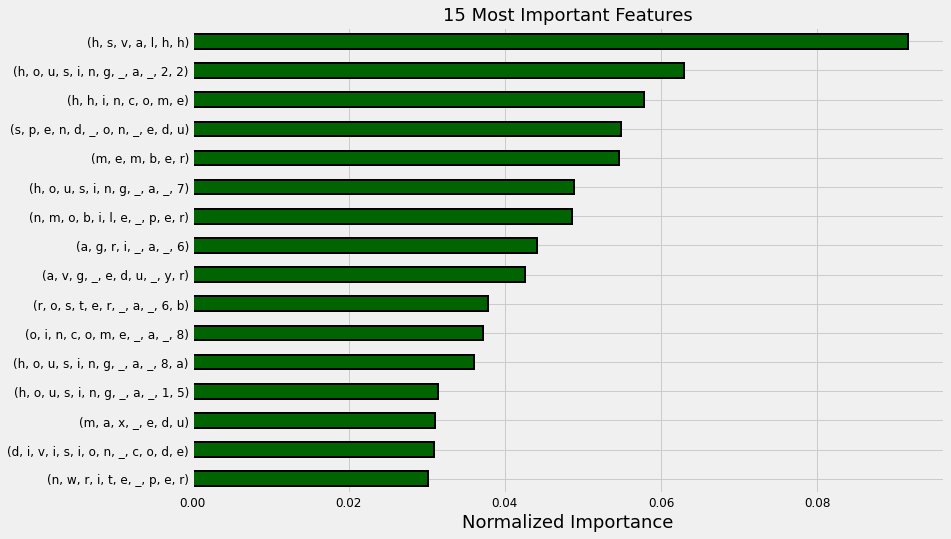

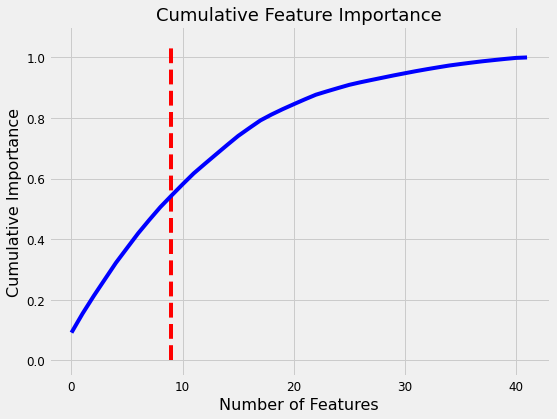

9 features required for 50% of cumulative importance.


In [ ]:
imp_features = plot_feature_importances(feature_importances, threshold=0.5)

# Feature Selection

In [ ]:
X = feature.iloc[:,0:42]  #independent columns
print(X.columns)
y = df1.iloc[:,53:54]    #target column 
print(y.columns)

Index(['roster_a_5', 'roster_a_6b', 'roster_a_7', 'roster_a_13', 'educ_a_4',
       'educ_a_5', 'health_a1_1', 'member', 'nmobile_per', 'nemployed_per',
       'nwrite_per', 'max_edu', 'avg_edu_yr', 'spend_on_edu', 'tot_sci',
       'spend_on_health', 'housing_a_2', 'housing_a_3', 'housing_a_4a',
       'housing_a_4c', 'housing_a_5b', 'housing_a_6b', 'housing_a_7',
       'housing_a_8a', 'housing_a_8b', 'housing_a_9', 'housing_a_10',
       'housing_a_13', 'housing_a_14', 'housing_a_15', 'housing_a_19',
       'housing_a_21b', 'housing_a_22', 'oincome_a_8', 'oincome_d_1',
       'agri_a_6', 'tot_income', 'tot_agri_val', 'urbrural_a', 'division_code',
       'hsvalhh', 'hhincome'],
      dtype='object')
Index(['upperpoor'], dtype='object')


# Upper poor
**UpperPoor Section**





# Train Test Split

In [ ]:
feature.columns

Index(['roster_a_5', 'roster_a_6b', 'roster_a_7', 'roster_a_13', 'educ_a_4',
       'educ_a_5', 'health_a1_1', 'member', 'nmobile_per', 'nemployed_per',
       'nwrite_per', 'max_edu', 'avg_edu_yr', 'spend_on_edu', 'tot_sci',
       'spend_on_health', 'housing_a_2', 'housing_a_3', 'housing_a_4a',
       'housing_a_4c', 'housing_a_5b', 'housing_a_6b', 'housing_a_7',
       'housing_a_8a', 'housing_a_8b', 'housing_a_9', 'housing_a_10',
       'housing_a_13', 'housing_a_14', 'housing_a_15', 'housing_a_19',
       'housing_a_21b', 'housing_a_22', 'oincome_a_8', 'oincome_d_1',
       'agri_a_6', 'tot_income', 'tot_agri_val', 'urbrural_a', 'division_code',
       'hsvalhh', 'hhincome', 'lowerpoor', 'upperpoor'],
      dtype='object')

In [ ]:
feature_data = X

In [ ]:
feature_data.head()

,roster_a_5,roster_a_6b,roster_a_7,roster_a_13,educ_a_4,educ_a_5,health_a1_1,member,nmobile_per,nemployed_per,nwrite_per,max_edu,avg_edu_yr,spend_on_edu,tot_sci,spend_on_health,housing_a_2,housing_a_3,housing_a_4a,housing_a_4c,housing_a_5b,housing_a_6b,housing_a_7,housing_a_8a,housing_a_8b,housing_a_9,housing_a_10,housing_a_13,housing_a_14,housing_a_15,housing_a_19,housing_a_21b,housing_a_22,oincome_a_8,oincome_d_1,agri_a_6,tot_income,tot_agri_val,urbrural_a,division_code,hsvalhh,hhincome
0,1.0,26.0,1.0,1.0,1.0,6.0,1.0,4.0,0.500000,0.250000,1.00,11.0,5.75,19400.0,2.0,0.0,4.0,2.0,1.0,3.0,3.0,2.0,640.0,1.0,2.0,2.0,2.0,3.0,1.0,22.0,2.0,1.0,700000.0,40000.0,2.0,0.06,2000.0,0.0,2.0,10.0,2500.0,13500.000
1,1.0,23.0,1.0,1.0,1.0,10.0,1.0,4.0,0.500000,0.250000,1.00,10.0,6.25,8400.0,2.0,0.0,4.0,2.0,1.0,3.0,3.0,2.0,520.0,1.0,2.0,2.0,2.0,3.0,1.0,21.0,2.0,1.0,1000000.0,12000.0,2.0,0.10,1000.0,0.0,2.0,10.0,2000.0,10666.667
2,1.0,23.0,1.0,1.0,2.0,0.0,1.0,4.0,0.750000,0.250000,0.75,10.0,1.75,16500.0,2.0,0.0,2.0,2.0,1.0,3.0,3.0,2.0,200.0,1.0,2.0,2.0,2.0,3.0,1.0,20.0,2.0,1.0,200000.0,15000.0,2.0,0.02,0.0,1.0,2.0,10.0,2500.0,15287.583
3,1.0,23.0,2.0,1.0,1.0,10.0,1.0,6.0,0.666667,0.333333,1.00,13.0,10.00,13600.0,3.0,0.0,5.0,2.0,1.0,3.0,5.0,4.0,640.0,2.0,2.0,2.0,2.0,3.0,1.0,21.0,2.0,1.0,1200000.0,50000.0,2.0,0.05,1500.0,1.0,2.0,10.0,3000.0,51958.332
4,1.0,26.0,1.0,1.0,1.0,3.0,1.0,1.0,1.000000,1.000000,1.00,3.0,3.00,0.0,1.0,0.0,2.0,2.0,1.0,3.0,3.0,2.0,280.0,3.0,2.0,2.0,2.0,3.0,1.0,20.0,2.0,1.0,500000.0,0.0,2.0,0.04,0.0,0.0,2.0,10.0,1500.0,8533.333


In [ ]:
target.head()

,upperpoor
0,0
1,0
2,0
3,0
4,0


In [ ]:
frames = [feature_data, target]

In [ ]:
final_data = pd.concat(frames, axis=1, sort=False)

In [ ]:
final_data.head()

,roster_a_5,roster_a_6b,roster_a_7,roster_a_13,educ_a_4,educ_a_5,health_a1_1,member,nmobile_per,nemployed_per,nwrite_per,max_edu,avg_edu_yr,spend_on_edu,tot_sci,spend_on_health,housing_a_2,housing_a_3,housing_a_4a,housing_a_4c,housing_a_5b,housing_a_6b,housing_a_7,housing_a_8a,housing_a_8b,housing_a_9,housing_a_10,housing_a_13,housing_a_14,housing_a_15,housing_a_19,housing_a_21b,housing_a_22,oincome_a_8,oincome_d_1,agri_a_6,tot_income,tot_agri_val,urbrural_a,division_code,hsvalhh,hhincome,upperpoor
0,1.0,26.0,1.0,1.0,1.0,6.0,1.0,4.0,0.500000,0.250000,1.00,11.0,5.75,19400.0,2.0,0.0,4.0,2.0,1.0,3.0,3.0,2.0,640.0,1.0,2.0,2.0,2.0,3.0,1.0,22.0,2.0,1.0,700000.0,40000.0,2.0,0.06,2000.0,0.0,2.0,10.0,2500.0,13500.000,0
1,1.0,23.0,1.0,1.0,1.0,10.0,1.0,4.0,0.500000,0.250000,1.00,10.0,6.25,8400.0,2.0,0.0,4.0,2.0,1.0,3.0,3.0,2.0,520.0,1.0,2.0,2.0,2.0,3.0,1.0,21.0,2.0,1.0,1000000.0,12000.0,2.0,0.10,1000.0,0.0,2.0,10.0,2000.0,10666.667,0
2,1.0,23.0,1.0,1.0,2.0,0.0,1.0,4.0,0.750000,0.250000,0.75,10.0,1.75,16500.0,2.0,0.0,2.0,2.0,1.0,3.0,3.0,2.0,200.0,1.0,2.0,2.0,2.0,3.0,1.0,20.0,2.0,1.0,200000.0,15000.0,2.0,0.02,0.0,1.0,2.0,10.0,2500.0,15287.583,0
3,1.0,23.0,2.0,1.0,1.0,10.0,1.0,6.0,0.666667,0.333333,1.00,13.0,10.00,13600.0,3.0,0.0,5.0,2.0,1.0,3.0,5.0,4.0,640.0,2.0,2.0,2.0,2.0,3.0,1.0,21.0,2.0,1.0,1200000.0,50000.0,2.0,0.05,1500.0,1.0,2.0,10.0,3000.0,51958.332,0
4,1.0,26.0,1.0,1.0,1.0,3.0,1.0,1.0,1.000000,1.000000,1.00,3.0,3.00,0.0,1.0,0.0,2.0,2.0,1.0,3.0,3.0,2.0,280.0,3.0,2.0,2.0,2.0,3.0,1.0,20.0,2.0,1.0,500000.0,0.0,2.0,0.04,0.0,0.0,2.0,10.0,1500.0,8533.333,0


In [ ]:
final_data.columns

Index(['roster_a_5', 'roster_a_6b', 'roster_a_7', 'roster_a_13', 'educ_a_4',
       'educ_a_5', 'health_a1_1', 'member', 'nmobile_per', 'nemployed_per',
       'nwrite_per', 'max_edu', 'avg_edu_yr', 'spend_on_edu', 'tot_sci',
       'spend_on_health', 'housing_a_2', 'housing_a_3', 'housing_a_4a',
       'housing_a_4c', 'housing_a_5b', 'housing_a_6b', 'housing_a_7',
       'housing_a_8a', 'housing_a_8b', 'housing_a_9', 'housing_a_10',
       'housing_a_13', 'housing_a_14', 'housing_a_15', 'housing_a_19',
       'housing_a_21b', 'housing_a_22', 'oincome_a_8', 'oincome_d_1',
       'agri_a_6', 'tot_income', 'tot_agri_val', 'urbrural_a', 'division_code',
       'hsvalhh', 'hhincome', 'upperpoor'],
      dtype='object')

In [ ]:
X_new = final_data.iloc[:,0:42] 
features_new = X_new.columns
features_new

Index(['roster_a_5', 'roster_a_6b', 'roster_a_7', 'roster_a_13', 'educ_a_4',
       'educ_a_5', 'health_a1_1', 'member', 'nmobile_per', 'nemployed_per',
       'nwrite_per', 'max_edu', 'avg_edu_yr', 'spend_on_edu', 'tot_sci',
       'spend_on_health', 'housing_a_2', 'housing_a_3', 'housing_a_4a',
       'housing_a_4c', 'housing_a_5b', 'housing_a_6b', 'housing_a_7',
       'housing_a_8a', 'housing_a_8b', 'housing_a_9', 'housing_a_10',
       'housing_a_13', 'housing_a_14', 'housing_a_15', 'housing_a_19',
       'housing_a_21b', 'housing_a_22', 'oincome_a_8', 'oincome_d_1',
       'agri_a_6', 'tot_income', 'tot_agri_val', 'urbrural_a', 'division_code',
       'hsvalhh', 'hhincome'],
      dtype='object')

In [ ]:
y_new = final_data.iloc[:,42:43]
target_new = y_new.columns
target_new

Index(['upperpoor'], dtype='object')

In [ ]:
train, test = train_test_split(final_data, test_size = 0.3)
print(len(final_data))
print(len(train))
print(len(test))

45812
32068
13744


In [ ]:
x_train = train[features_new]
y_train = train[target_new]

x_test = test[features_new]
y_test = test[target_new]

# Machine learning model

In [ ]:
# Model imports
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score
#from sklearn.preprocessing import Imputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



In [ ]:
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [ ]:
import warnings 
from sklearn.exceptions import ConvergenceWarning

# Filter out warnings from models
warnings.filterwarnings('ignore', category = ConvergenceWarning)
warnings.filterwarnings('ignore', category = DeprecationWarning)
warnings.filterwarnings('ignore', category = UserWarning)

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=10, 
                               n_jobs = -1)
# 10 fold cross validation
cv_score = cross_val_score(model, x_train, y_train, cv = 10, scoring = scorer)

print(f'10 Fold Cross Validation F1 Score = {round(cv_score.mean(), 4)} with std = {round(cv_score.std(), 4)}')

10 Fold Cross Validation F1 Score = 0.7082 with std = 0.0077


In [ ]:
#PCA Analysis

In [ ]:
#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

Feature ranking:
1. feature 40 (0.084398)
2. feature 32 (0.068462)
3. feature 41 (0.058036)
4. feature 7 (0.056042)
5. feature 13 (0.054377)
6. feature 22 (0.047365)
7. feature 8 (0.047168)
8. feature 35 (0.044883)
9. feature 12 (0.042857)
10. feature 33 (0.039973)
11. feature 1 (0.037123)
12. feature 23 (0.034049)
13. feature 29 (0.031576)
14. feature 10 (0.031285)
15. feature 39 (0.030069)
16. feature 11 (0.029352)
17. feature 9 (0.026406)
18. feature 36 (0.025137)
19. feature 20 (0.019390)
20. feature 5 (0.017480)
21. feature 16 (0.016840)
22. feature 14 (0.015939)
23. feature 37 (0.015312)
24. feature 27 (0.011121)
25. feature 28 (0.010756)
26. feature 38 (0.010742)
27. feature 26 (0.010585)
28. feature 0 (0.007744)
29. feature 24 (0.007625)
30. feature 31 (0.007570)
31. feature 6 (0.007298)
32. feature 18 (0.007074)
33. feature 4 (0.006532)
34. feature 21 (0.006505)
35. feature 3 (0.006423)
36. feature 19 (0.004822)
37. feature 2 (0.004629)
38. feature 25 (0.004362)
39. feature 15

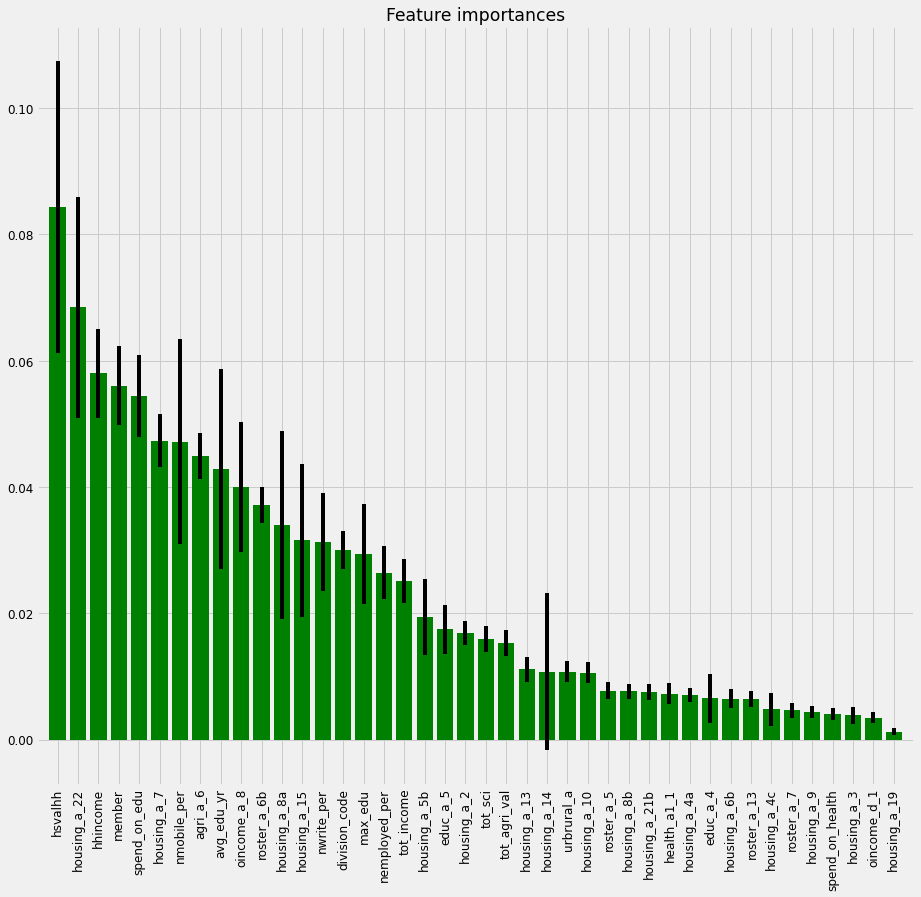

In [ ]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(x_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clr_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

# Model Selection

In [ ]:
model_results = pd.DataFrame(columns = ['model', 'cv_mean', 'cv_std'])

In [ ]:

def cv_model(train, train_labels, model, name, model_results=None):
    """Perform 10 fold cross validation of a model"""
    
    cv_scores = cross_val_score(model, train, train_labels, cv = 10, scoring=scorer, n_jobs = -1)
    print(f'10 Fold CV Score: {round(cv_scores.mean(), 5)} with std: {round(cv_scores.std(), 5)}')
    
    if model_results is not None:
        model_results = model_results.append(pd.DataFrame({'model': name, 
                                                           'cv_mean': cv_scores.mean(), 
                                                            'cv_std': cv_scores.std()},
                                                           index = [0]),
                                             ignore_index = True)

        return model_results

In [ ]:
from sklearn.metrics import accuracy_score
model_results = cv_model(x_train, y_train, 
                         GaussianNB(), 'GNB', model_results)

10 Fold CV Score: 0.48504 with std: 0.00683


In [ ]:
model_results = cv_model(x_train, y_train,
                          RandomForestClassifier(),
                              'RF', model_results)

10 Fold CV Score: 0.70716 with std: 0.0081


In [ ]:
model_results = cv_model(x_train, y_train, 
                          LinearDiscriminantAnalysis(), 
                          'LDA', model_results)

10 Fold CV Score: 0.65443 with std: 0.00836


# Comparing Model Performance

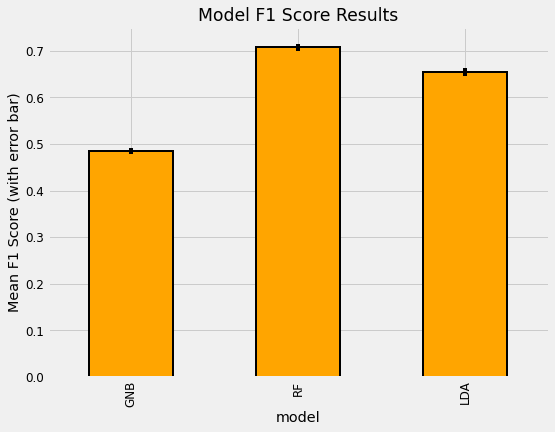

In [ ]:
model_results.set_index('model', inplace = True)
model_results['cv_mean'].plot.bar(color = 'orange', figsize = (8, 6),
                                  yerr = list(model_results['cv_std']),
                                  edgecolor = 'k', linewidth = 2)
plt.title('Model F1 Score Results');
plt.ylabel('Mean F1 Score (with error bar)');
model_results.reset_index(inplace = True)

# Accuracy

In [ ]:
Nb=GaussianNB()
Nb= Nb.fit(x_train,y_train)
y_pred=Nb.predict(x_test)
score = accuracy_score(y_test, y_pred) * 100
print("Accuracy using  GaussianNB: ", round(score,1), "%" )

Accuracy using  GaussianNB:  47.5 %


In [ ]:
RF = RandomForestClassifier(n_estimators=100, max_depth=5,
                             random_state=0)
RF = RF.fit(x_train, y_train)
y_pred = RF.predict(x_test)
score = accuracy_score(y_test, y_pred) * 100
print("Accuracy using Random Forest Classifier: ", round(score, 1), "%" )

Accuracy using Random Forest Classifier:  77.7 %


In [ ]:
LDA = LinearDiscriminantAnalysis()
LDA = LDA.fit(x_train, y_train)
y_pred = LDA.predict(x_test)
score = accuracy_score(y_test, y_pred) * 100
print("Accuracy using LinearDiscriminantAnalysis: ", round(score, 1), "%" )

Accuracy using LinearDiscriminantAnalysis:  78.5 %


# LightGBM
LightGBM, short for Light Gradient Boosted Machine, is a free and open source distributed gradient boosting framework for machine learning originally developed by Microsoft.  It is designed to be distributed and efficient with the following advantages: Faster training speed and higher efficiency. Lower memory usage.

In [ ]:
import lightgbm as lgb
classifier = lgb.LGBMClassifier(max_depth=-1, learning_rate=0.1, objective='binary',
                             random_state=None, silent=True, metric='None', 
                             n_jobs=2, n_estimators=5000, class_weight='balanced',
                             colsample_bytree =  0.93, min_child_samples = 95, num_leaves = 14, subsample = 0.96)

In [ ]:
eval_set = [(x_train, y_train), (x_test, y_test)]
classifier.fit(x_train, y_train, eval_metric="binary", eval_set=eval_set, verbose=True, early_stopping_rounds=400) #LGBoost model model
y_pred = classifier.predict(x_test) 
y_pred = y_pred.reshape(-1, 1)

[1]	training's binary_logloss: 0.668411	valid_1's binary_logloss: 0.669383
Training until validation scores don't improve for 400 rounds.
[2]	training's binary_logloss: 0.647881	valid_1's binary_logloss: 0.649948
[3]	training's binary_logloss: 0.629922	valid_1's binary_logloss: 0.632909
[4]	training's binary_logloss: 0.614156	valid_1's binary_logloss: 0.617563
[5]	training's binary_logloss: 0.601093	valid_1's binary_logloss: 0.605531
[6]	training's binary_logloss: 0.589923	valid_1's binary_logloss: 0.595573
[7]	training's binary_logloss: 0.57879	valid_1's binary_logloss: 0.585193
[8]	training's binary_logloss: 0.568109	valid_1's binary_logloss: 0.575937
[9]	training's binary_logloss: 0.558665	valid_1's binary_logloss: 0.567471
[10]	training's binary_logloss: 0.550094	valid_1's binary_logloss: 0.559677
[11]	training's binary_logloss: 0.542934	valid_1's binary_logloss: 0.553294
[12]	training's binary_logloss: 0.536046	valid_1's binary_logloss: 0.547317
[13]	training's binary_logloss: 0.5

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred)
print (cm1)

[[8684 1721]
 [ 856 2483]]


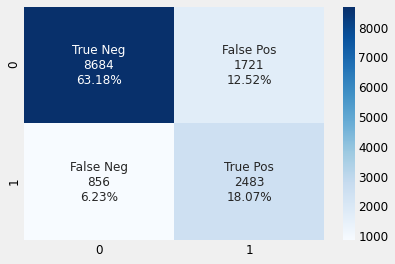

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm1.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm1.flatten()/np.sum(cm1)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm1, annot=labels, fmt='', cmap='Blues')

In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average ='macro')
print ('f1 score for LGBoost model:',f1)

f1 score for LGBoost model: 0.7645767142952147


In [ ]:

#y_pred = LDA.predict(x_test)
score = accuracy_score(y_test, y_pred) * 100
print("Accuracy using LightGBM: ", round(score, 1), "%" )

Accuracy using LightGBM:  81.2 %


Text(0.5, 1.0, 'Feature importance')

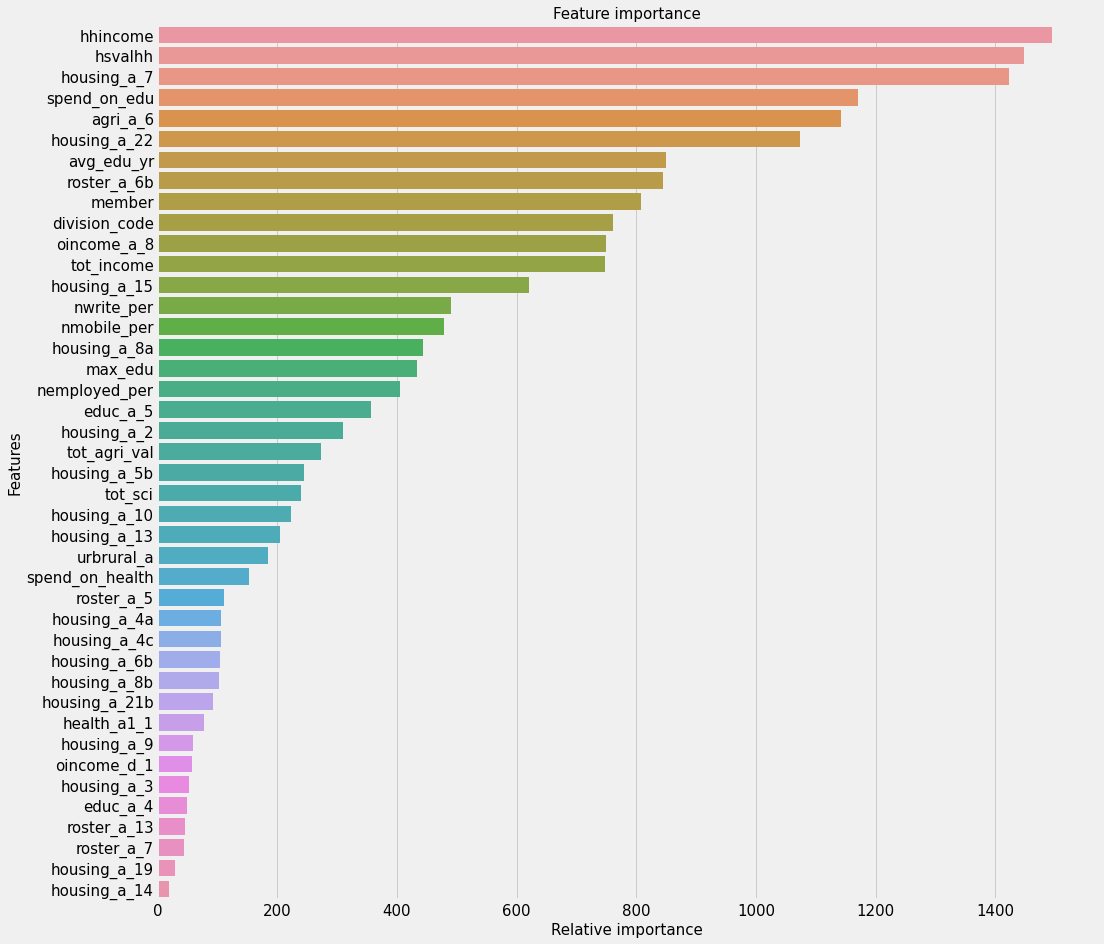

In [ ]:
# Visualise with a barplot
import seaborn as sns
indices = np.argsort(classifier.feature_importances_)[::-1]
indices = indices[:42]


plt.subplots(figsize=(15, 15))
g = sns.barplot(y=train.columns[indices], x = classifier.feature_importances_[indices], orient='h')
g.set_xlabel("Relative importance",fontsize=15)
g.set_ylabel("Features",fontsize=15)
g.tick_params(labelsize=15)
g.set_title("Feature importance", fontsize=15)

# Lower Poor

In [ ]:
l_target = feature.iloc[:,42:43]
l_target.columns

Index(['lowerpoor'], dtype='object')

# Train test split

In [ ]:
frames = [feature_data, l_target]
final_data = pd.concat(frames, axis=1, sort=False)
final_data.head()

X_new = final_data.iloc[:,0:42] 
features_new = X_new.columns
print(features_new)

y_new = final_data.iloc[:,42:43]
target_new = y_new.columns
print(target_new)

Index(['roster_a_5', 'roster_a_6b', 'roster_a_7', 'roster_a_13', 'educ_a_4',
       'educ_a_5', 'health_a1_1', 'member', 'nmobile_per', 'nemployed_per',
       'nwrite_per', 'max_edu', 'avg_edu_yr', 'spend_on_edu', 'tot_sci',
       'spend_on_health', 'housing_a_2', 'housing_a_3', 'housing_a_4a',
       'housing_a_4c', 'housing_a_5b', 'housing_a_6b', 'housing_a_7',
       'housing_a_8a', 'housing_a_8b', 'housing_a_9', 'housing_a_10',
       'housing_a_13', 'housing_a_14', 'housing_a_15', 'housing_a_19',
       'housing_a_21b', 'housing_a_22', 'oincome_a_8', 'oincome_d_1',
       'agri_a_6', 'tot_income', 'tot_agri_val', 'urbrural_a', 'division_code',
       'hsvalhh', 'hhincome'],
      dtype='object')
Index(['lowerpoor'], dtype='object')


In [ ]:
train, test = train_test_split(final_data, test_size = 0.3)
print(len(final_data))
print(len(train))
print(len(test))

45812
32068
13744


In [ ]:
x_train = train[features_new]
y_train = train[target_new]

x_test = test[features_new]
y_test = test[target_new]

# Model

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=10, 
                               n_jobs = -1)
# 10 fold cross validation
cv_score = cross_val_score(model, x_train, y_train, cv = 10, scoring = scorer)

print(f'10 Fold Cross Validation F1 Score = {round(cv_score.mean(), 4)} with std = {round(cv_score.std(), 4)}')

10 Fold Cross Validation F1 Score = 0.6138 with std = 0.0122


In [ ]:
#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

Feature ranking:
1. feature 40 (0.082910)
2. feature 32 (0.059691)
3. feature 41 (0.059273)
4. feature 13 (0.055952)
5. feature 7 (0.055134)
6. feature 22 (0.052547)
7. feature 35 (0.046340)
8. feature 8 (0.043248)
9. feature 1 (0.040963)
10. feature 12 (0.039680)
11. feature 23 (0.034365)
12. feature 33 (0.032995)
13. feature 10 (0.032910)
14. feature 29 (0.032346)
15. feature 11 (0.030549)
16. feature 39 (0.029346)
17. feature 9 (0.027986)
18. feature 36 (0.023943)
19. feature 20 (0.018768)
20. feature 5 (0.017799)
21. feature 16 (0.016921)
22. feature 14 (0.016824)
23. feature 37 (0.016733)
24. feature 28 (0.013546)
25. feature 27 (0.011934)
26. feature 26 (0.011397)
27. feature 31 (0.009065)
28. feature 24 (0.008263)
29. feature 0 (0.008061)
30. feature 18 (0.007867)
31. feature 38 (0.007780)
32. feature 3 (0.007629)
33. feature 4 (0.007372)
34. feature 6 (0.007203)
35. feature 21 (0.007165)
36. feature 25 (0.005349)
37. feature 2 (0.005228)
38. feature 19 (0.004549)
39. feature 17

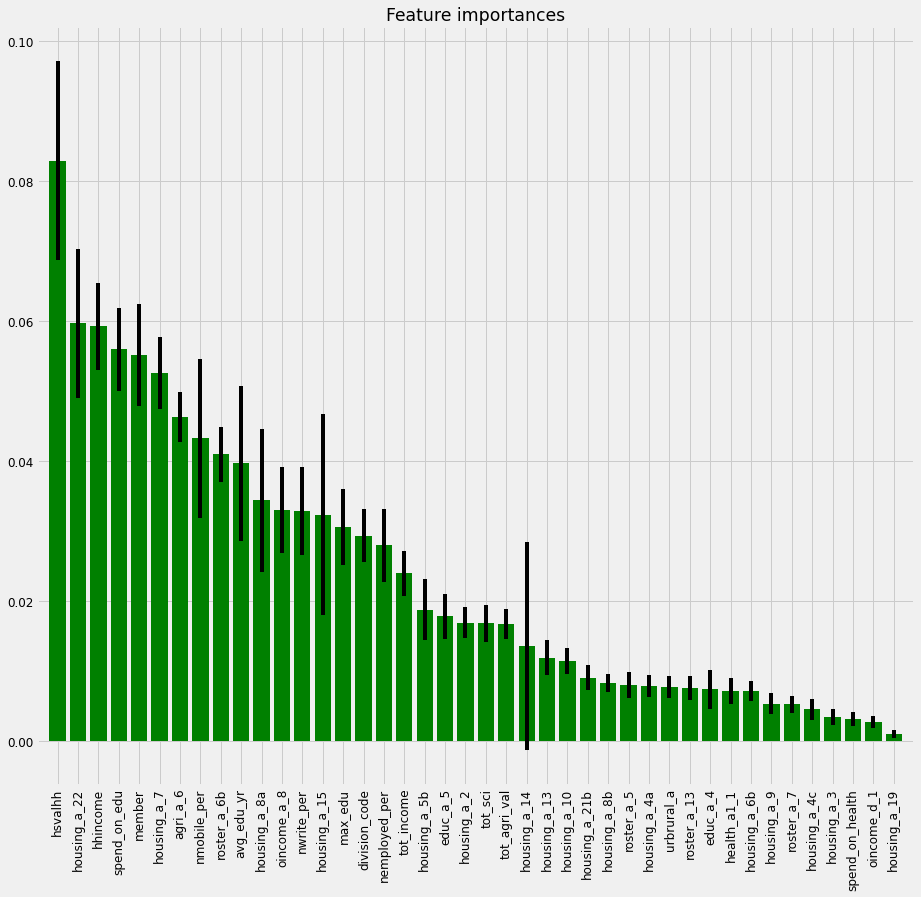

In [ ]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(x_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clr_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

In [ ]:
model_results = pd.DataFrame(columns = ['model', 'cv_mean', 'cv_std'])

In [ ]:

def cv_model(train, train_labels, model, name, model_results=None):
    """Perform 10 fold cross validation of a model"""
    
    cv_scores = cross_val_score(model, train, train_labels, cv = 10, scoring=scorer, n_jobs = -1)
    print(f'10 Fold CV Score: {round(cv_scores.mean(), 5)} with std: {round(cv_scores.std(), 5)}')
    
    if model_results is not None:
        model_results = model_results.append(pd.DataFrame({'model': name, 
                                                           'cv_mean': cv_scores.mean(), 
                                                            'cv_std': cv_scores.std()},
                                                           index = [0]),
                                             ignore_index = True)

        return model_results

In [ ]:
from sklearn.metrics import accuracy_score
model_results = cv_model(x_train, y_train, 
                         GaussianNB(), 'GNB', model_results)

model_results = cv_model(x_train, y_train,
                          RandomForestClassifier(),
                              'RF', model_results)

model_results = cv_model(x_train, y_train, 
                          LinearDiscriminantAnalysis(), 
                          'LDA', model_results)

10 Fold CV Score: 0.41495 with std: 0.00707
10 Fold CV Score: 0.61378 with std: 0.00921
10 Fold CV Score: 0.5954 with std: 0.01652


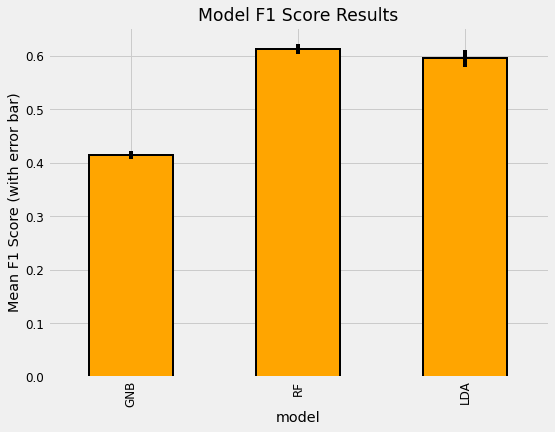

In [ ]:
model_results.set_index('model', inplace = True)
model_results['cv_mean'].plot.bar(color = 'orange', figsize = (8, 6),
                                  yerr = list(model_results['cv_std']),
                                  edgecolor = 'k', linewidth = 2)
plt.title('Model F1 Score Results');
plt.ylabel('Mean F1 Score (with error bar)');
model_results.reset_index(inplace = True)

# Accuracy

In [ ]:
Nb=GaussianNB()
Nb= Nb.fit(x_train,y_train)
y_pred=Nb.predict(x_test)
score = accuracy_score(y_test, y_pred) * 100
print("Accuracy using  GaussianNB: ", round(score, 1), "%" )

Accuracy using  GaussianNB:  44.0 %


In [ ]:
RF = RandomForestClassifier(n_estimators=100, max_depth=5,
                             random_state=0)
RF = RF.fit(x_train, y_train)
y_pred = RF.predict(x_test)
score = accuracy_score(y_test, y_pred) * 100
print("Accuracy using Random Forest Classifier: ", round(score, 1), "%" )

Accuracy using Random Forest Classifier:  87.6 %


In [ ]:
LDA = LinearDiscriminantAnalysis()
LDA = LDA.fit(x_train, y_train)
y_pred = LDA.predict(x_test)
score = accuracy_score(y_test, y_pred) * 100
print("Accuracy using LinearDiscriminantAnalysis: ", round(score, 1), "%" )

Accuracy using LinearDiscriminantAnalysis:  88.0 %


# LightGBM_lowerpoor

In [ ]:
eval_set = [(x_train, y_train), (x_test, y_test)]
classifier.fit(x_train, y_train, eval_metric="binary", eval_set=eval_set, verbose=True, early_stopping_rounds=400) #LGBoost model model
y_pred = classifier.predict(x_test) 
y_pred = y_pred.reshape(-1, 1)

[1]	training's binary_logloss: 0.663628	valid_1's binary_logloss: 0.664408
Training until validation scores don't improve for 400 rounds.
[2]	training's binary_logloss: 0.639248	valid_1's binary_logloss: 0.641003
[3]	training's binary_logloss: 0.618481	valid_1's binary_logloss: 0.621155
[4]	training's binary_logloss: 0.600849	valid_1's binary_logloss: 0.60465
[5]	training's binary_logloss: 0.585991	valid_1's binary_logloss: 0.59066
[6]	training's binary_logloss: 0.572897	valid_1's binary_logloss: 0.578446
[7]	training's binary_logloss: 0.558879	valid_1's binary_logloss: 0.565838
[8]	training's binary_logloss: 0.547296	valid_1's binary_logloss: 0.555126
[9]	training's binary_logloss: 0.536689	valid_1's binary_logloss: 0.545754
[10]	training's binary_logloss: 0.527713	valid_1's binary_logloss: 0.537656
[11]	training's binary_logloss: 0.519048	valid_1's binary_logloss: 0.530029
[12]	training's binary_logloss: 0.511543	valid_1's binary_logloss: 0.523371
[13]	training's binary_logloss: 0.50

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred)
print (cm1)

[[10952  1084]
 [  673  1035]]


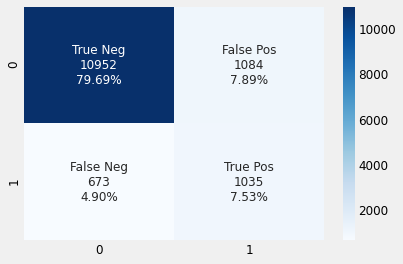

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm1.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm1.flatten()/np.sum(cm1)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm1, annot=labels, fmt='', cmap='Blues')

In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average ='macro')
print ('f1 score for LGBoost model:',f1)

f1 score for LGBoost model: 0.7333182169311281


In [ ]:
#y_pred = LDA.predict(x_test)
score = accuracy_score(y_test, y_pred) * 100
print("Accuracy using LightGBM: ", round(score, 1), "%" )

Accuracy using LightGBM:  87.2 %


Text(0.5, 1.0, 'Feature importance')

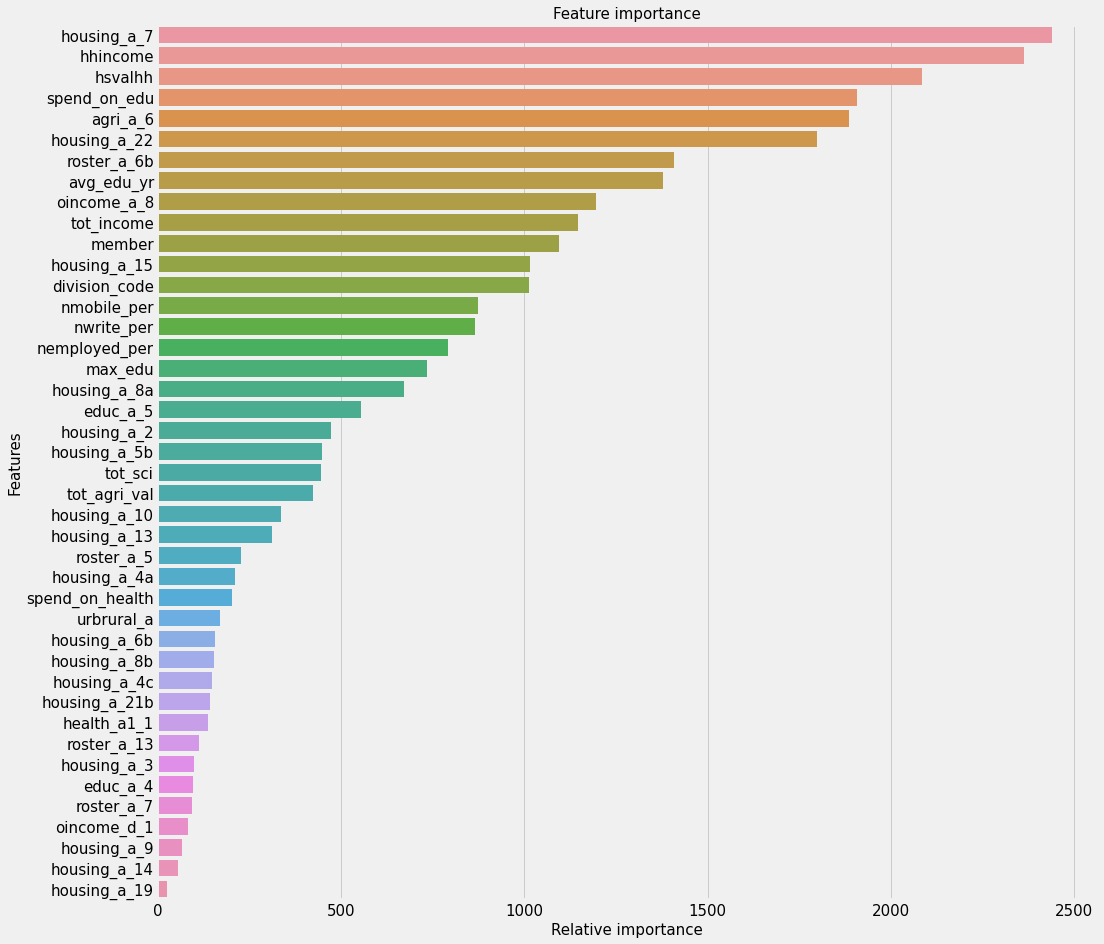

In [ ]:
# Visualise with a barplot
import seaborn as sns
indices = np.argsort(classifier.feature_importances_)[::-1]
indices = indices[:42]


plt.subplots(figsize=(15, 15))
g = sns.barplot(y=train.columns[indices], x = classifier.feature_importances_[indices], orient='h')
g.set_xlabel("Relative importance",fontsize=15)
g.set_ylabel("Features",fontsize=15)
g.tick_params(labelsize=15)
g.set_title("Feature importance", fontsize=15)